# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

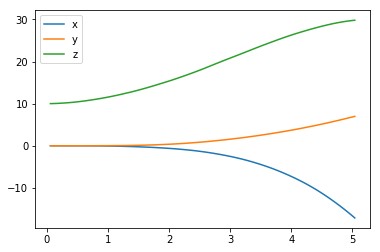

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

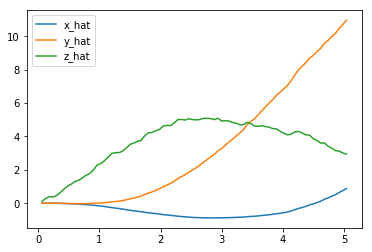

In [22]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

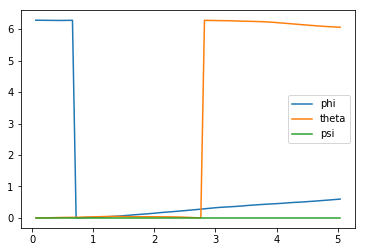

In [23]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

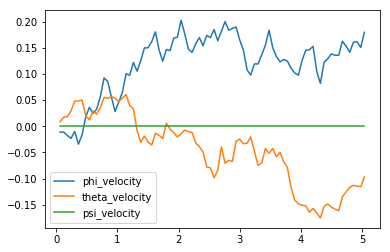

In [24]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

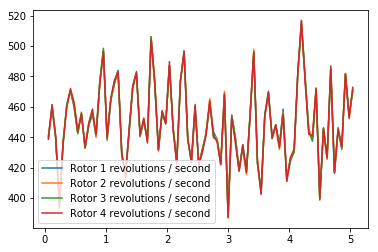

In [25]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [26]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -2.00800336  16.56054653  28.0239407    0.59846783   6.05888833   0.        ]
[  0.8776393   10.95526745   2.9397714 ]
[ 0.17938768 -0.09725522  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [6]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 100
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()
    
    
    
    


Episode =  100, score =  -0.229 (best =  -0.001), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [28]:
## TODO: Train your agent here


### Task: Hover in place 

In [53]:
%load_ext autoreload
%autoreload 2
import sys
import pandas as pd
import numpy as np

# from agents.policy_search import PolicySearch_Agent
from agents.agent import DDPG
from task import Task

target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = DDPG(task) 

num_episodes = 100
scores = []
rewardsHover = []
for i_episode in range(1, num_episodes+1):
    rewardsHover.append([])
    rewardsHover[i_episode-1] = []
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        rewardsHover[i_episode-1].append(reward)
        agent.step(action, reward, next_state, done)
        state = next_state
        
        if done:
            scores.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
            break
    sys.stdout.flush()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode =  100, score =  -4.300 (best =   2.995)

In [ ]:
## TODO: Plot the rewards.
x = [i for i in range(len(rewardsHover[0]))]
plt.plot(x, rewardsHover[0])
# plt.xlabel = 'timesteps'
# plt.ylabel = 'reward'
plt.title('Task: Hover - Rewards ( t )')
plt.savefig('results/hoverRewards.png', format="png")
plt.show()

x = [i for i in range(len(scores))]
plt.plot(x, scores, '*')
# plt.xlabel('epoch')
# plt.ylabel('score')
plt.title('Task: Hover - Score for different epochs')
plt.savefig('results/hoverScores.png', format="png")
plt.show()

## calculate average score
scoreAverage = np.mean(np.array(scores))
print("\nAverage Score: ", scoreAverage)

with open('rewardsHover.pckl', 'wb') as fp:
    pickle.dump(rewardsHover, fp)
with open('scoreHover.pckl', 'wb') as fp:
    pickle.dump(scores, fp)

# Mean reward of agent of last 10 episodes
### Task: Easy Take-off

In [108]:
data = np.array(rewardsHover)
avg = []
for i in range(10):
    x = data[i]
    avg.append((np.array(x).mean()))
print(np.array(avg).mean())

-14.1226420839


### Task: Easy Take-off

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Agent and task ready.
Episode =  200, score = -16.119 (best =  -2.759)

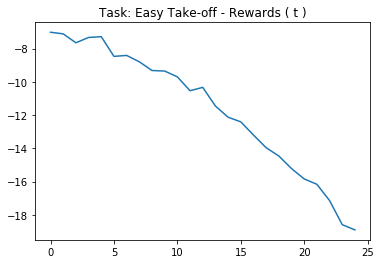

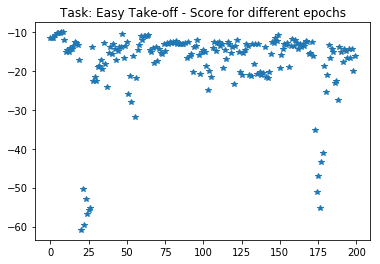


Average Score:  -17.8657260569


In [21]:
%load_ext autoreload
%autoreload 2
import sys
import pandas as pd
import numpy as np

# from agents.policy_search import PolicySearch_Agent
from agents.agent import DDPG
from task import Task
num_episodes = 200
target_pos = np.array([0., 0., 20.])
task = Task(target_pos=target_pos, init_pose = np.array([0.0, 0.0, 10.0, 0.0, 0.0, 0.0]), addAccell2Reward = True)
agent = DDPG(task) 
print("Agent and task ready.")

scores = []
rewardsEasy = []

for i_episode in range(1, num_episodes+1):
    rewardsEasy.append([])
    rewardsEasy[i_episode-1] = []
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        rewardsEasy[i_episode-1].append(reward)
        agent.step(action, reward, next_state, done)
        state = next_state
        
        if done:
            scores.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
            break
    sys.stdout.flush()

import pickle
## TODO: Plot the rewards.
x = [i for i in range(len(rewardsEasy[0]))]
plt.plot(x, rewardsEasy[0])
# plt.xlabel('timeSteps')
# plt.ylabel('reward')
plt.title('Task: Easy Take-off - Rewards ( t )')
plt.savefig('results/easyRewards.png', format="png")
plt.show()

x = [i for i in range(len(scores))]
plt.plot(x, scores, '*')
# plt.xlabel('epoch')
# plt.ylabel('score')
plt.title('Task: Easy Take-off - Score for different epochs')
plt.savefig('results/easyScores.png', format="png")
plt.show()

## calculate average score
scoreAverage = np.mean(np.array(scores))
print("\nAverage Score: ", scoreAverage)

with open('rewardsEasy.pckl', 'wb') as fp:
    pickle.dump(rewardsEasy, fp)
with open('scoreEasy.pckl', 'wb') as fp:
    pickle.dump(scores, fp)

# Examine flight statistics
### Task: Easy Take-off

In [12]:
%load_ext autoreload
%autoreload 2
### Create agent and env
import sys
import pandas as pd
import numpy as np

# from agents.policy_search import PolicySearch_Agent
from agents.agent import DDPG
from task import Task

target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = DDPG(task) 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
### run some simulations
num_episodes = 30
scores = []
rewardsHover = []
for i_episode in range(1, num_episodes+1):
    rewardsHover.append([])
    rewardsHover[i_episode-1] = []
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        rewardsHover[i_episode-1].append(reward)
        agent.step(action, reward, next_state, done)
        state = next_state
        
        if done:
            scores.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =   30, score =  -4.215 (best =   2.998)

Episode =    1, score =  -6.749 (best =   2.998)

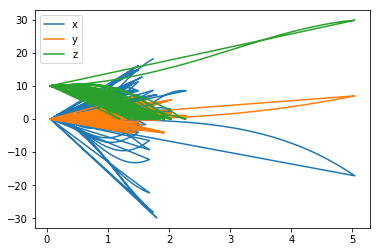

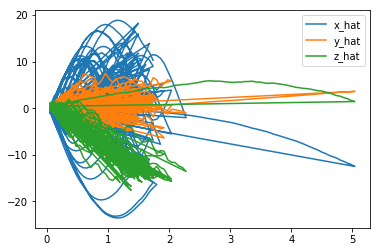

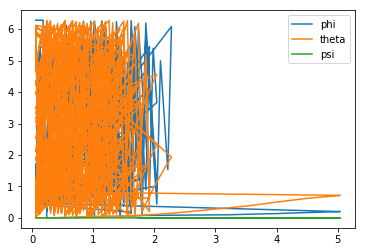

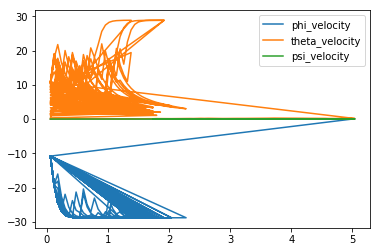

Final pose:  [ 18.16994363  -3.55885626   0.           3.00026434   0.86797026   0.        ]
Final speed:  [ 10.29532459  -3.02104719 -14.49186397]
Final angular speed:  [-28.83456564   1.54979078   0.        ]
Total Timesteps:  1345


In [52]:
num_episodes = 1
scores = []
rewardsHover = []
for i_episode in range(1, num_episodes+1):
    rewardsHover.append([])
    rewardsHover[i_episode-1] = []
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        rewardsHover[i_episode-1].append(reward)
        agent.step(action, reward, next_state, done)
        state = next_state
        
        if done:
            scores.append(agent.score)
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                i_episode, agent.score, agent.best_score), end="")  # [debug]
            break
    sys.stdout.flush()

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()
plt.show()



plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()
plt.show()




plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()
plt.show()



plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()
plt.show()



# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print("Final pose: ", task.sim.pose)
print("Final speed: ", task.sim.v)
print("Final angular speed: ", task.sim.angular_v)


print("Total Timesteps: ", len(results['time']))

# Parameter tuning

## Create functions 

In [7]:
# %load_ext autoreload
# %autoreload 2
import sys
import pandas as pd
import numpy as np

# from agents.policy_search import PolicySearch_Agent
from agents.agent import DDPG
from task import Task

def runTraining(num_episodes = 10, mu = 0, theta = 0.15, sigma = 0.2, gamma = 0.99, tau = 0.01, drawPlot = False):
    target_pos = np.array([0., 0., 10.])
    task = Task(target_pos=target_pos, init_pose = np.array([0.0, 0.0, 10.0, 0.0, 0.0, 0.0]), addAccell2Reward = False )
    agent = DDPG(task, mu = mu, theta = theta, sigma = sigma, gamma = gamma, tau = tau) 

    scores = []
    for i_episode in range(1, num_episodes+1):
        state = agent.reset_episode() # start a new episode
        while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            agent.step(action, reward, next_state, done)
            state = next_state

            if done:
                scores.append(agent.score)
                print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f})".format(
                    i_episode, agent.score, agent.best_score), end="")  # [debug]
                break
        sys.stdout.flush()

    ## TODO: Plot the rewards.
    if drawPlot:
        x = [i for i in range(len(scores))]
        plt.plot(x, scores)
        plt.xlabel = 'epochs'
        plt.ylabel = 'score'
        # plt.savefig('results/hover.png', format="png")

    ## calculate average score
    scoreAverage = np.mean(np.array(scores))
    print("\nAverage Score: ", scoreAverage)
    return scoreAverage

i = 1
def printExpl(i):
    print("\nExperiment:", i )
    print("\
        Episodes = {:5d} \n\
        μ = {:5.3f} \n\
        θ = {:5.3f} \n\
        σ = {:5.3f} \n\
        γ = {:5.3f} \n\
        τ = {:5.3f} ".format(num_episodes, mu, theta, sigma, gamma, tau))

    
num_episodes = 100
mu = 0 
theta = 0.15 
sigma = 0.2
gamma = 0.99 # Discount factor
tau = 0.01 # for soft update of target parameters
drawPlot = False
c = 25

### Test a bunch of γ values

In [8]:
### Test a bunch of gammas
#Initialize
i = 1
mu = 0 
theta = 0.15 
sigma = 0.2
gamma = 0.99 # Discount factor
tau = 0.01 # for soft update of target parameters
drawPlot = False
gammaRes = []

#Experiments
gamma = 0.999
printExpl(i)
i += 1
scoreAverage = 0
for j in range(c):
    scoreAverage += runTraining(num_episodes, mu, theta , sigma , gamma , tau , drawPlot )
gammaRes.append([gamma,scoreAverage/c])

gamma = 0.99
printExpl(i)
i += 1
scoreAverage = 0
for j in range(c):
    scoreAverage += runTraining(num_episodes, mu, theta , sigma , gamma , tau , drawPlot )
gammaRes.append([gamma,scoreAverage/c])

gamma = 0.97
printExpl(i)
i += 1
scoreAverage = 0
for j in range(c):
    scoreAverage += runTraining(num_episodes, mu, theta , sigma , gamma , tau , drawPlot )
gammaRes.append([gamma,scoreAverage/c])

gamma = 0.95
printExpl(i)
i += 1
scoreAverage = 0
for j in range(c):
    scoreAverage += runTraining(num_episodes, mu, theta , sigma , gamma , tau , drawPlot )
gammaRes.append([gamma,scoreAverage/c])

gamma = 0.90
printExpl(i)
i += 1
scoreAverage = 0
for j in range(c):
    scoreAverage += runTraining(num_episodes, mu, theta , sigma , gamma , tau , drawPlot )
gammaRes.append([gamma,scoreAverage/c])

gamma = 0.8
printExpl(i)
i += 1
scoreAverage = 0
for j in range(c):
    scoreAverage += runTraining(num_episodes, mu, theta , sigma , gamma , tau , drawPlot )
gammaRes.append([gamma,scoreAverage/c])

print("\nResults from γ experiments:")
for x in gammaRes:
    print("   γ = ", x[0], ", average score = ", x[1])
    
    
with open('gammaRes', 'wb') as fp:
    pickle.dump(gammaRes, fp)


Experiment: 1
        Episodes =   100 
        μ = 0.000 
        θ = 0.150 
        σ = 0.200 
        γ = 0.999 
        τ = 0.010 
Episode =  100, score =  -2.360 (best =   2.996)
Average Score:  -3.18392214892
Episode =  100, score =   0.355 (best =   2.998)
Average Score:  -4.68110444285
Episode =  100, score =  -2.733 (best =   2.997)
Average Score:  -2.13035721244
Episode =  100, score =  -0.329 (best =   2.998)
Average Score:  -0.701796484402
Episode =  100, score =  -1.035 (best =   2.999)
Average Score:  -0.955307267573
Episode =  100, score = -32.258 (best =   2.995)
Average Score:  -13.8812589503
Episode =  100, score =   0.123 (best =   2.997)
Average Score:  -3.01329253384
Episode =  100, score =  -2.825 (best =   2.994)
Average Score:  -4.92536545891
Episode =  100, score =  -2.449 (best =   2.997)
Average Score:  -2.61321261097
Episode =  100, score =  -2.217 (best =   2.999)
Average Score:  -1.69276186332
Episode =  100, score = -25.546 (best =   2.996)
Average Score

Episode =  100, score = -56.136 (best =   2.998)
Average Score:  -33.8907282659
Episode =  100, score =  -2.075 (best =   2.997)
Average Score:  -4.16282904175
Episode =  100, score =  -0.564 (best =   2.997)
Average Score:  -1.49600326022
Episode =  100, score =  -0.826 (best =   2.997)
Average Score:  -1.42672034561

Experiment: 5
        Episodes =   100 
        μ = 0.000 
        θ = 0.150 
        σ = 0.200 
        γ = 0.900 
        τ = 0.010 
Episode =  100, score =  -0.374 (best =   2.998)
Average Score:  -0.290294837633
Episode =  100, score =   0.123 (best =   2.997)
Average Score:  -0.684675857288
Episode =  100, score =  -0.708 (best =   2.997)
Average Score:  -0.889944250185
Episode =  100, score =  -0.850 (best =   2.997)
Average Score:  -1.35274528732
Episode =  100, score =  -0.410 (best =   2.998)
Average Score:  -0.732132387566
Episode =  100, score =  -0.653 (best =   2.998)
Average Score:  -2.1499111112
Episode =  100, score = -24.550 (best =   2.997)
Average Scor

### Test a bunc of τ values

In [ ]:
### Test a bunch of taus
#Initialize
num_episodes = 100
c = 10
i = 1
mu = 0 
theta = 0.15 
sigma = 0.2
gamma = 0.99 # Discount factor
tau = 0.01 # for soft update of target parameters
drawPlot = False
gamma = 0.99
tauRes = []

# Experiments
tau = 0.4
printExpl(i)
i += 1
scoreAverage = 0
for j in range(c):
    scoreAverage += runTraining(num_episodes, mu, theta , sigma , gamma , tau , drawPlot )
tauRes.append([tau,scoreAverage/c])

tau = 0.2
printExpl(i)
i += 1
scoreAverage = 0
for j in range(c):
    scoreAverage += runTraining(num_episodes, mu, theta , sigma , gamma , tau , drawPlot )
tauRes.append([tau,scoreAverage/c])

tau = 0.1
printExpl(i)
i += 1
scoreAverage = 0
for j in range(c):
    scoreAverage += runTraining(num_episodes, mu, theta , sigma , gamma , tau , drawPlot )
tauRes.append([tau,scoreAverage/c])

tau = 0.01
printExpl(i)
i += 1
scoreAverage = 0
for j in range(c):
    scoreAverage += runTraining(num_episodes, mu, theta , sigma , gamma , tau , drawPlot )
tauRes.append([tau,scoreAverage/c])

tau = 0.001
printExpl(i)
i += 1
scoreAverage = 0
for j in range(c):
    scoreAverage += runTraining(num_episodes, mu, theta , sigma , gamma , tau , drawPlot )
tauRes.append([tau,scoreAverage/c])


print("\nResults from τ experiments:")
for x in tauRes:
    print("   τ = ", x[0], ", average score = ", x[1])
    
    
with open('tauRes', 'wb') as fp:
    pickle.dump(tauRes, fp)


Experiment: 1
        Episodes =   100 
        μ = 0.000 
        θ = 0.150 
        σ = 0.200 
        γ = 0.990 
        τ = 0.400 
Episode =  100, score = -61.453 (best =   2.995)
Average Score:  -49.8730004743
Episode =  100, score =  -2.357 (best =   2.997)
Average Score:  -9.00383425736
Episode =  100, score = -58.036 (best =   2.995)
Average Score:  -56.8463930143

Experiment: 2
        Episodes =   100 
        μ = 0.000 
        θ = 0.150 
        σ = 0.200 
        γ = 0.990 
        τ = 0.200 
Episode =  100, score =  -0.581 (best =   2.997)
Average Score:  -1.37531318178
Episode =  100, score =  -0.926 (best =   2.997)
Average Score:  -4.09830033929
Episode =  100, score =  -0.989 (best =   2.997)
Average Score:  -2.19171243319


In [13]:
print("\nResults from τ experiments:")
for x in tauRes:
    print("   τ = ", x[0], ", average score = ", x[1])


Results from τ experiments:
   τ =  0.4 , average score =  -28.8349006109
   τ =  0.2 , average score =  -13.0773506988
   τ =  0.1 , average score =  -5.12607663101
   τ =  0.01 , average score =  -8.87767219024
   τ =  0.001 , average score =  -4.15879941025


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

## Here we see the rewards plotted the first 4 epochs for the task of "hovering in place" 
- 1. run: blue
- 2. run: green
- 3. run: yellow
- 4. run: red

On the x-axis we have time steps and on the y-axis we have the immediate reward

It's a bit surprising that the first run was the longest, and got better reward than the ones before...

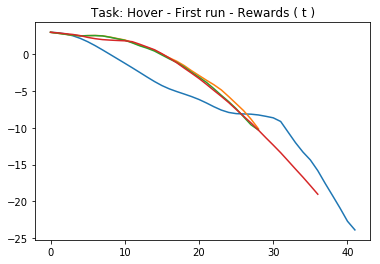

In [86]:
## TODO: Plot the rewards.

for i in range(4):
    x = [i for i in range(len(rewardsHover[i*10+1]))]
    
    plt.plot(np.array(x), np.array(rewardsHover[i*10+1]), label = "run" + str(i*10 + 1))
    plt.title('Task: Hover - First run - Rewards ( t )')
    plt.legend = True
    # plt.savefig('results/hoverRewards.png', format="png")
plt.show()

# epoch = 18
# x = [i for i in range(len(rewardsHover[epoch]))]
# plt.plot(x, rewardsHover[epoch])
# plt.title('Task: Hover - Run nr 100 - Rewards ( t )')
# # plt.savefig('results/hoverRewards.png', format="png")
# plt.show()



# Here we see the score for 100 epochs. The score is defined as the average reward for each timestep for a single episode.

- x-axis: epoch nr
- y-axis: score

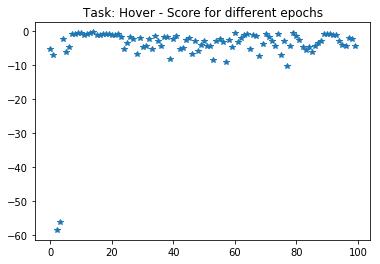


Average Score:  -4.10122204005


In [61]:
## TODO: Plot the rewards.

x = [i for i in range(len(scores))]
plt.plot(x, scores, '*')
plt.title('Task: Hover - Score for different epochs')
plt.savefig('results/hoverScores.png', format="png")
plt.show()

## calculate average score
scoreAverage = np.mean(np.array(scores))
print("\nAverage Score: ", scoreAverage)



## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:
I designed two tasks:

- Hover in place
    - Here the the drone started at (0,0,10) and tried to maintain its position. As we can see from the following graph it was doing ok IMO. 
    - The reward is just the same as was proposed in the lectures with p for the position vector:
        - $r = 1-0.3*|\bar p_{current} - \bar p_{target}|$
    - The reward function that was used is:
    
    
    reward = 1.-.3*(abs(self.sim.pose[:3] - self.target_pos)).sum()

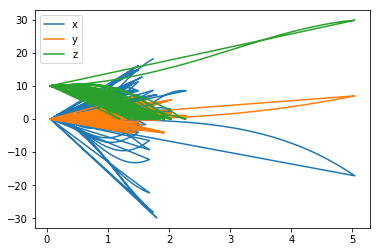

In [63]:
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()
plt.show()

- Easy take-off
     - Here the the drone started at $\bar p_{start} = (0,0,10)$ which I define as the ground, and tried to rise up to $\bar p_{target} = (0,0,20)$, with some restrictions on the acceleration. I should have added a criteria which signaled done if the drone has reached a certain height, that would have been more accurate. As we can see from the following graph it was doing ok IMO. 
    - The reward function that was used is:
        - $r = 1-0.3*|\bar p_{current} - \bar p_{target}| - |\hat a|$
    - Which in code is executed as so:
   
    
        reward = 1.-.3*(abs(self.sim.pose[:3] - self.target_pos)).sum()
                 - np.linalg.norm(self.sim.linear_accel)
    

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

- **What learning algorithm(s) did you try? What worked best for you?**
    - I have some experience with implementing a RL agents for the OpenAI Gym environment. I've done a deep Q-learning agent (DQN) ala David Silver and the guys at DeepMind. But I soon realised when implementing it for this project, that I wasn't sure how to convert those ideas to work with a continuous action space. So I scrapped that agent and made one that can be seen here. That agent is based on the examples shown previously in the lectures. 
    
- **What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?**
    - I did some tuning on the network layout, and on $\gamma$ and $\tau$. I ran trainings with different parameters and these are the results:
    

##### NN paramter tuning 
Task: hover in place
- Experiment 1
    - Actor structure: 32x64x32
    - Critic structure: 32x64
        - Average score = -3.17
- Experiment 2
    - Actor structure: 64x64x64
    - Critic structure: 32x64
        - Average score = -16.6
- Experiment 3
    - Actor structure: 32x64x32
    - Critic structure: 64x128
        - Average score = - 5.0
       
As can be seen from the previous figures, then the nn structure proposed in the lectures did work the best, so I settled for paramters in experiment 1.

##### $\tau$ and $\gamma$ tuning 


Results from τ experiments:


    τ =  0.4 , average score =  -28.8349006109
    τ =  0.2 , average score =  -13.0773506988
    τ =  0.1 , average score =  -5.12607663101
    τ =  0.01 , average score =  -8.87767219024
    τ =  0.001 , average score =  -4.15879941025

Results from γ experiments:

    γ =  0.999 , average score =  -6.74619976033
    γ =  0.99 , average score =  -5.35008390732
    γ =  0.97 , average score =  -5.3379978679
    γ =  0.95 , average score =  -8.66278188535
    γ =  0.9 , average score =  -5.43051821726
    γ =  0.8 , average score =  -5.91565554785

Each paramter setting was averaged over 26 trials of 100 epochs each. There is not a definite linear trend in any of the cases, and for the $\gamma$ reults then I wouldnt say there was much of a difference. So I settled for $\tau = 0.1$ and $\gamma = 0.99$, again, the same parameters as proposed in the lectures.    

- **What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.**


    - Actor net:
        - 1 input
            - States
        - Fully connected 3 hidden layers
            - layer 1: 32 units, relu activation
            - layer 2: 64 units, relu activation
            - layer 3: 32 units, relu activation
            - output layer: sigmoid activation
         - Optimizer: Adam
            
    - Critic net:
        - Fully connected
        - Input layers
            - 2 Inputs
                - States
                - Actions
            - State pathway
                - 2 hidden layers
                    - layer 1: 32 units, relu activation
                    - layer 2: 64 units, relu activation
            - Action pathway
                - 2 hidden layers
                    - layer 1: 32 units, relu activation
                    - layer 2: 64 units, relu activation
            - Add Action and State layer
                - Relu activation
            - Output layer
                - 1 output
         - Optimizer: Adam
         - Loss: Mean Square Error

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

- **Was it an easy task to learn or hard?**
    - I had some background in RL so this wasn't the hardest part of the whole degree.
- **Was there a gradual learning curve, or an aha moment?**
    - There were quite allot of those aha moments. :)
- **How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)**
    - The average reward for the task Easy Take-Off was -14, see measurments in the part "Mean reward of agent of last 10 episodes"


**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

- **What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)**
    - I was familiar with the concept of an environment, agent, rewards, markow descicion processes etc. But the design of the agent was quite demanding.
- **Did you find anything interesting in how the quadcopter or your agent behaved?** 
    - I'm surprised that it's not learning much over time, and seems to perform ok after just a few epochs. 
